![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

[TOC]

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:

# Загружаем инструенты для стандартизации переменных и расчета главных компонент:

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# Знакомство с датасетом

In [4]:
# DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')
df_city = pd.read_csv('worldcities.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1  # помечаем где у нас трейн
df_test['sample'] = 0  # помечаем где у нас тест
# в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями
df_test['Rating'] = 0

data = df_test.append(df_train, sort=False).reset_index(
    drop=True)  # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
45306,id_5570,Rome,NaN,5572.0,NaN,10.0,"[[], []]",/Restaurant_Review-g187791-d12141580-Reviews-P...,d12141580,1,4.0
10337,id_1228,Madrid,"['Mediterranean', 'Spanish', 'Vegetarian Frien...",1230.0,$$ - $$$,78.0,"[['Great place with hipster vibes', 'Original ...",/Restaurant_Review-g187514-d10331391-Reviews-E...,d10331391,1,4.0
29211,id_175,Athens,"['Healthy', 'Vegetarian Friendly', 'Vegan Opti...",176.0,$,81.0,"[['Excellent assortment of fresh juices', 'Ver...",/Restaurant_Review-g189400-d8505067-Reviews-No...,d8505067,1,5.0
46169,id_6919,Madrid,NaN,6922.0,NaN,7.0,"[['Great atmosphere', 'Friendly staff'], ['04/...",/Restaurant_Review-g187514-d10836022-Reviews-C...,d10836022,1,3.0
7434,id_7434,Rome,"['Italian', 'Seafood', 'Mediterranean', 'Soups...",272.0,$$$$,1871.0,"[['Wonderful', 'Good fish restaurant'], ['11/1...",/Restaurant_Review-g187791-d1536097-Reviews-El...,d1536097,0,0.0


В датасете большое количество нечисловых данных и относительно много пропусков.

Приведем названия колонок к единообразному виду:

In [14]:
data.columns = [col.lower() for col in data.columns]
data.columns = [col.replace(' ', '_') for col in data.columns]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   restaurant_id      50000 non-null  object 
 1   city               50000 non-null  object 
 2   cuisine_style      38410 non-null  object 
 3   ranking            50000 non-null  float64
 4   price_range        32639 non-null  object 
 5   number_of_reviews  46800 non-null  float64
 6   reviews            49998 non-null  object 
 7   url_ta             50000 non-null  object 
 8   id_ta              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


# Предобработка

In [16]:
def plot(col, ttl):
    '''Функция рисования диаграмм'''
    plt.figure(figsize=(15, 5))
    plt.suptitle(ttl)
    plt.subplot(121)
    plt.title("абсолютные значения")
    data[col].hist(bins=15)
    plt.subplot(122)
    plt.title("логарифмы")
    data[col].apply(np.log).hist(bins=15)


def outliers_iqr(ys):
    '''Получение индексов строк показателей, лежащих за пределеами 
    1.5 межквартильных интервалов'''
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]


def iqr(var, verbose: bool = True):
    '''Функция расчета параметров межквартильного интервала'''
    global perc25, perc75, IQR
    IQR = data[var].quantile(0.75) - data[var].quantile(0.25)
    perc25 = data[var].quantile(0.25)
    perc75 = data[var].quantile(0.75)

    if verbose:
        print(
            '25-й перцентиль: {},'.format(perc25),
            '75-й перцентиль: {},'.format(perc75),
            "IQR: {}, ".format(IQR),
            "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


def preproc_data(df_input):
    '''Функция отсеивания нечисловых признаков'''
    df_output = df_input.copy()
    object_columns = [s for s in df_output.columns if df_output[s].dtypes ==
                      'object' or df_output[s].dtypes == 'datetime64[ns]']
    df_output.drop(object_columns, axis=1, inplace=True)
    return df_output


def identify_collinear(correlation_threshold):
    '''Часть кода модуля для выявления коллинеарных признаков'''
    '''Источник: https://github.com/WillKoehrsen/feature-selector'''
    corr_matrix = cor
    ops = {}
    # Extract the upper triangle of the correlation matrix
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Select the features with correlations above the threshold
    # Need to use the absolute value
    to_drop = [column for column in upper.columns if any(
        upper[column].abs() > correlation_threshold)]

    # Dataframe to hold correlated pairs
    record_collinear = pd.DataFrame(
        columns=['drop_feature', 'corr_feature', 'corr_value'])

    # Iterate through the columns to drop to record pairs of correlated features
    for column in to_drop:

        # Find the correlated features
        corr_features = list(
            upper.index[upper[column].abs() > correlation_threshold])

        # Find the correlated values
        corr_values = list(
            upper[column][upper[column].abs() > correlation_threshold])
        drop_features = [column for _ in range(len(corr_features))]

        # Record the information (need a temp df for now)
        temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                          'corr_feature': corr_features,
                                          'corr_value': corr_values})

        # Add to dataframe
        record_collinear = record_collinear.append(temp_df, ignore_index=True)

    ops['collinear'] = to_drop
    return record_collinear
    # print('%d features with a correlation magnitude greater than %0.2f.\n' % (len(ops['collinear']), correlation_threshold))


def pc_compr(col1, col2, n_components=1):
    '''Функция расчета главной компоненты на основе двух признаков'''
    x = np.array(data[col1])
    y = np.array(data[col2])
    X = np.vstack((x, y))
    pca = PCA(n_components)
    XPCAreduced = pca.fit_transform(np.transpose(X))
    return XPCAreduced

# Анализ признаков и Feature Ingineering

## City

<AxesSubplot:title={'center':'Количество ресторанов в городах'}>

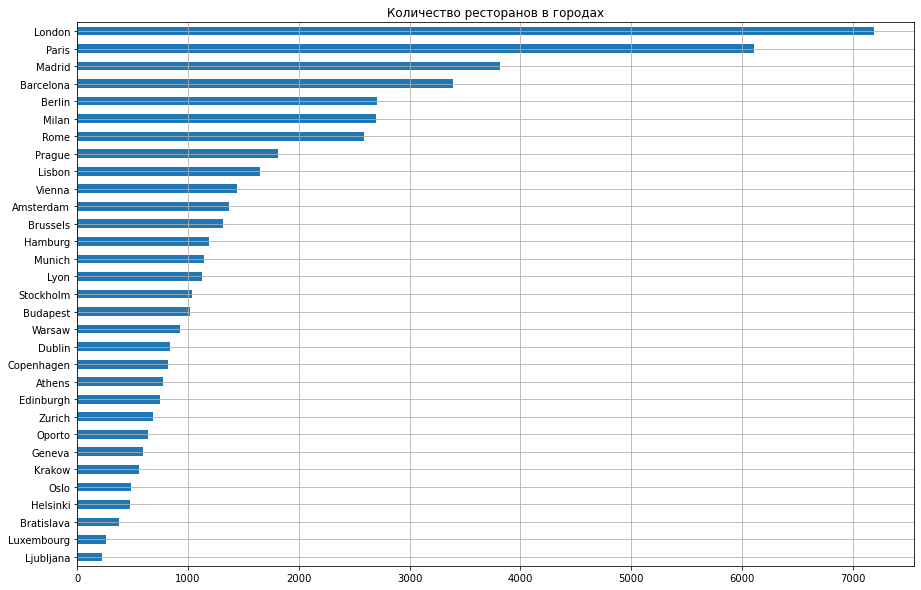

In [17]:
plt.figure(figsize=(15, 10))
data.city.value_counts(ascending=True).plot(grid=True,
                                            kind='barh',
                                            title='Количество ресторанов в городах')

Переименуем название города Porto (Португалия) на используемое во внешних датасетах:

In [18]:
data.loc[data.city == 'Oporto', 'city'] = 'Porto'

Создадим признак "количество ресторанов в городе":

In [19]:
n_city_dict = dict(data.city.value_counts())
data['n_rest_per_city'] = data.city.map(n_city_dict)

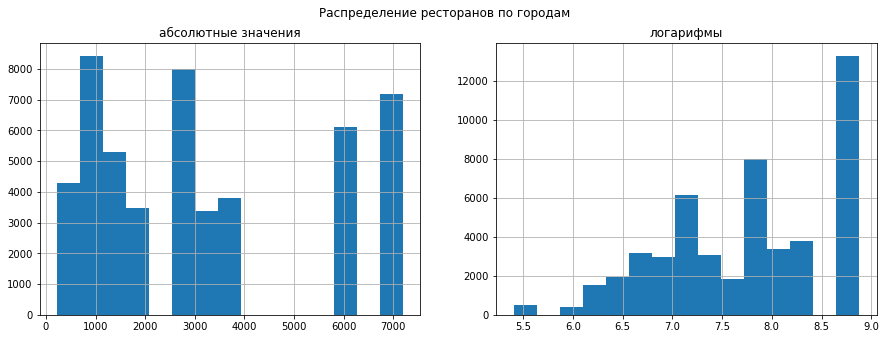

In [20]:
plot('n_rest_per_city', 'Распределение ресторанов по городам')

Создадим переменную "количество ресторанов по городам" с логарифмированными значениями. И создаим Dummies-переменные для признака City.

In [21]:
data['n_rest_per_city_log'] = data.n_rest_per_city.apply(np.log)
data['city_dum'] = data.city
data = pd.get_dummies(data, columns=['city_dum'])

## Ranking

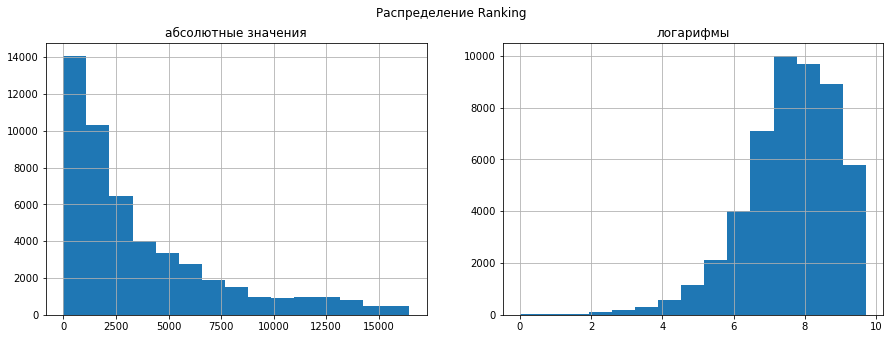

In [22]:
plot('ranking', 'Распределение Ranking')

Создадим переменную с логарифмами значиний Ranking:

In [23]:
data['ranking_log'] = data.ranking.apply(np.log)

Создадим признак Ranking на количетсво ресторанов в городе:

In [24]:
data['ranking_per_rest_per_city'] = data.ranking / data.n_rest_per_city

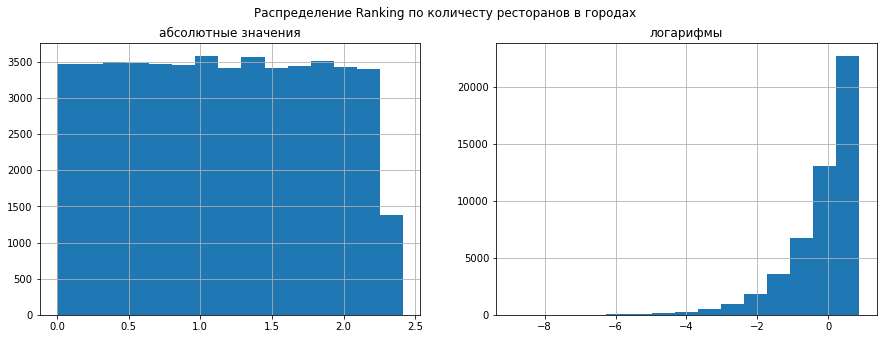

In [25]:
plot('ranking_per_rest_per_city',
     'Распределение Ranking по количесту ресторанов в городах')

Логарифмированные значения выделим в отдельный признак:

In [26]:
data['ranking_per_rest_per_city_log'] = data.ranking_per_rest_per_city.apply(
    np.log)

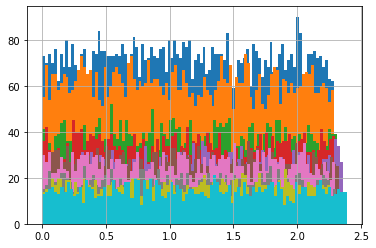

In [27]:
# посмотрим на топ 10 городов
for x in (data['city'].value_counts())[0:10].index:
    data['ranking_per_rest_per_city'][data['city'] == x].hist(bins=100)

Рассчитаем среднее по каждому городу значение Ranking и отклонения Ranking от среднего приведем к количеству ресторанов в городе:

In [28]:
mean_ranking_per_city = dict(data.groupby('city')['ranking'].mean())
data['mean_ranking_per_city'] = data.city.map(mean_ranking_per_city)
data['mean_ranking_per_rest_per_city'] = (
    data.ranking - data.mean_ranking_per_city) / data.n_rest_per_city

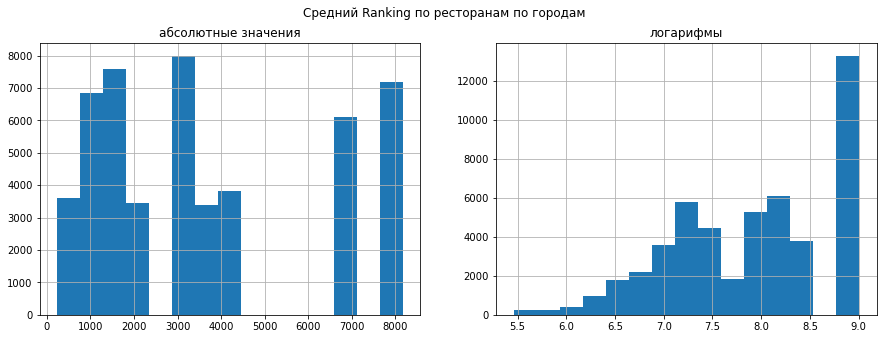

In [29]:
plot('mean_ranking_per_city', 'Средний Ranking по ресторанам по городам')

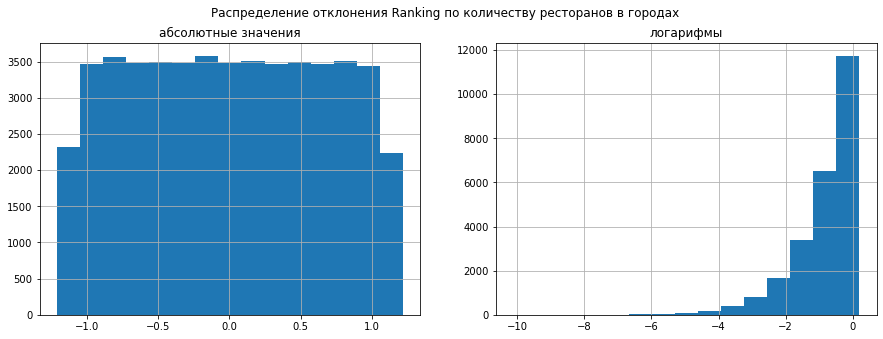

In [30]:
plot('mean_ranking_per_rest_per_city',
     'Распределение отклонения Ranking по количеству ресторанов в городах')

Логарифмированные значения выделим в отдельные признаки. Учтем наличие нулевых значений при логарифмировании.

In [31]:
data['mean_ranking_per_city_log'] = data.mean_ranking_per_city.apply(np.log)
data['mean_ranking_per_rest_per_city_log'] = data.mean_ranking_per_rest_per_city.apply(
    lambda x: np.log(x) if x > 0 else x)

In [32]:
data['mean_ranking_per_rest_per_city_log'].isna().sum()

0

## ID_TA

In [33]:
data.id_ta.value_counts()

d4914988     2
d1235635     2
d9802625     2
d7337366     2
d11999956    2
            ..
d10252892    1
d952903      1
d1345892     1
d4747919     1
d789937      1
Name: id_ta, Length: 49963, dtype: int64

Некоторые Id в рейтинге TripAdvisor задваиваются.

Приведем признак к числовому виду:

In [34]:
data.id_ta = data.id_ta.apply(lambda x: float(x[1:]))

In [35]:
data.id_ta.isna().sum()

0

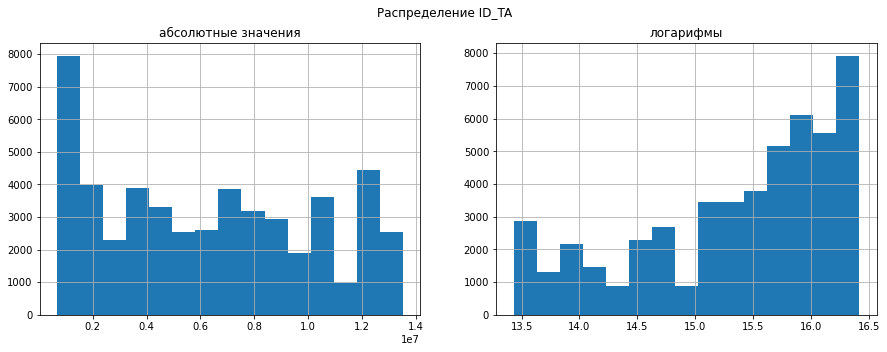

In [36]:
plot('id_ta', 'Распределение ID_TA')

Логарифмированные значения выделим в отельный показатель:

In [37]:
data['id_ta_log'] = data.id_ta.apply(np.log)

## Restaurant ID

Приведем показатель к числовому виду:

In [38]:
data.restaurant_id = data.restaurant_id.apply(lambda x: float(x.split('_')[1]))

In [39]:
data.restaurant_id.describe()

count    50000.000000
mean      3938.252580
std       3597.493647
min          0.000000
25%       1111.000000
50%       2709.000000
75%       5918.000000
max      16422.000000
Name: restaurant_id, dtype: float64

В датасете 16 нулевых значений. Пока оставим их.

In [40]:
data.restaurant_id[data.restaurant_id == 0].value_counts()

0.0    16
Name: restaurant_id, dtype: int64

<AxesSubplot:title={'center':'логарифмы'}>

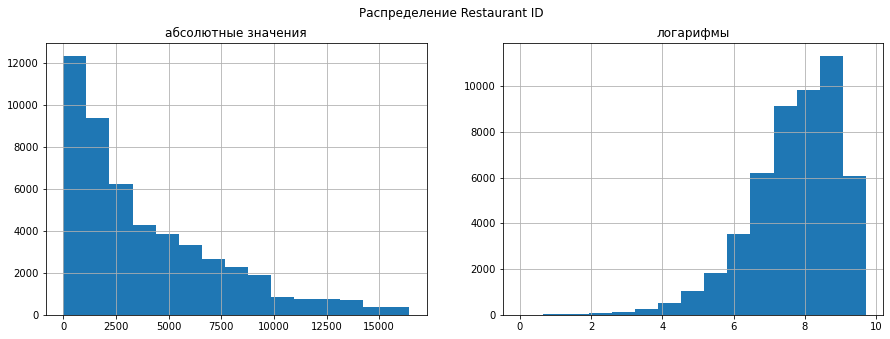

In [41]:
plt.figure(figsize=(15, 5))
plt.suptitle('Распределение Restaurant ID')
plt.subplot(121)
plt.title("абсолютные значения")
data.restaurant_id.hist(bins=15)
plt.subplot(122)
plt.title("логарифмы")
data.restaurant_id[data.restaurant_id > 0].apply(np.log).hist(bins=15)

Логарифмирвоанные значения выведем в отдельный признак. Нулевые значения оставим.

In [42]:
data['restaurant_id_log'] = data.restaurant_id.apply(
    lambda x: np.log(x) if x > 0 else x)

Создадим признак для сетевого/не сетевого ресторана:

In [43]:
chain_list = list(data.restaurant_id.value_counts()[
                  data.restaurant_id.value_counts() > 1].index)
data['chain'] = data[data.restaurant_id.isin(
    chain_list)].restaurant_id.apply(lambda x: 1)
data['chain'].fillna(0, inplace=True)

Создадим признак сетевой/не сетевой с помощью dummies:

In [44]:
data = pd.get_dummies(data, columns=['chain'], drop_first=True)

In [45]:
data['chain_1.0'].value_counts()

1    46193
0     3807
Name: chain_1.0, dtype: int64

## Price Range

Ранжируем ценовые диапазоны от 1 до 3 и заполним пропуски модой по городам.

In [46]:
data.price_range.unique()

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

In [47]:
price_ranges = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
data.price_range = data.price_range.map(price_ranges)

In [48]:
city_list = data.city.unique()
for x in city_list:
    data.price_range.fillna(data[data['city'] == x]
                            ['price_range'].mode()[0], inplace=True)

Создадим dummie-признаки на основе ранжированных цен:

In [49]:
data = pd.get_dummies(data, columns=['price_range'])

## Number of reviews

In [50]:
data.number_of_reviews.describe()

count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: number_of_reviews, dtype: float64

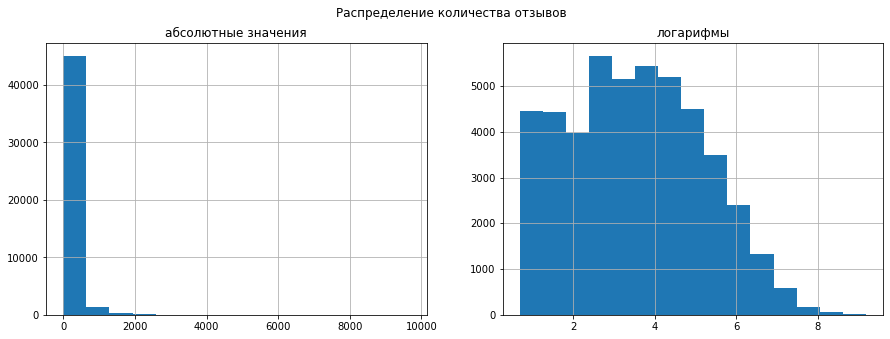

In [51]:
plot('number_of_reviews', 'Распределение количества отзывов')

В признаке явно присутствуют выбросы:

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_reviews'>

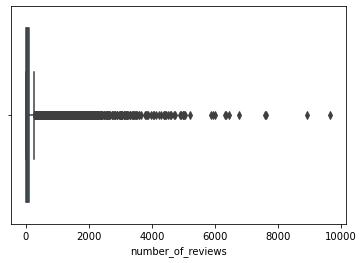

In [52]:
sns.boxplot(data.number_of_reviews)

Посмотрим количество выбросов на основе анализа межквартильного интервала:

In [53]:
iqr('number_of_reviews')

25-й перцентиль: 9.0, 75-й перцентиль: 115.0, IQR: 106.0,  Границы выбросов: [-150.0, 274.0].


Наблюдается 5428 выбросов:

In [54]:
outliers_list = outliers_iqr(data.number_of_reviews.dropna())
len(outliers_list)

5428

Распределение выбросов:

<AxesSubplot:>

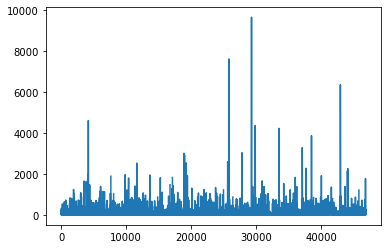

In [55]:
(data.loc[outliers_list]['number_of_reviews']).plot()

In [56]:
(data.loc[outliers_list]['number_of_reviews']).max()

9660.0

In [57]:
data.number_of_reviews.shape

(50000,)

In [58]:
data.loc[outliers_list]['number_of_reviews'].max()

9660.0

Физически заменять выбросы не будем, попробуем посмотреть на результаты логарифмирования.

Заполним пропуски средним, характерным для каждого города.

In [59]:
for x in city_list:
    data['number_of_reviews'].fillna(
        data[data['city'] == x]['number_of_reviews'].mean(), inplace=True)

In [60]:
data.number_of_reviews.isna().sum()

0

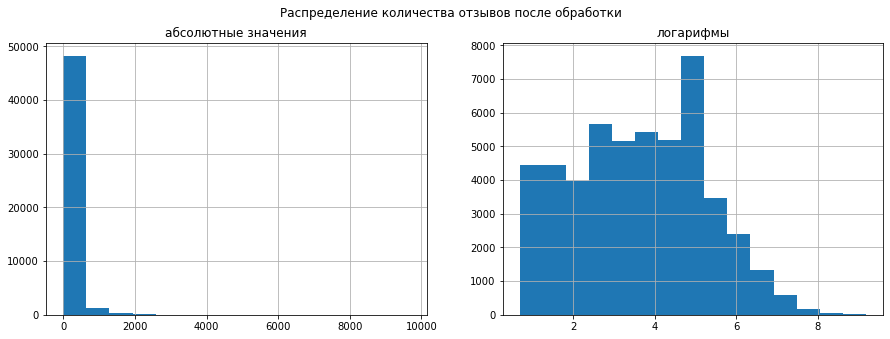

In [61]:
plot('number_of_reviews', 'Распределение количества отзывов после обработки')

Логарифмирование справилось с выбросами. Выделим значения логарифмов в отдельный признак:

In [62]:
data['number_of_reviews_log'] = data.number_of_reviews.apply(np.log)

Сгруппируем количство отзывово по городам:

In [63]:
n_rev_per_city_dic = dict(data.groupby(['city'])['number_of_reviews'].sum())
data['n_rev_per_city'] = data.city.map(n_rev_per_city_dic)

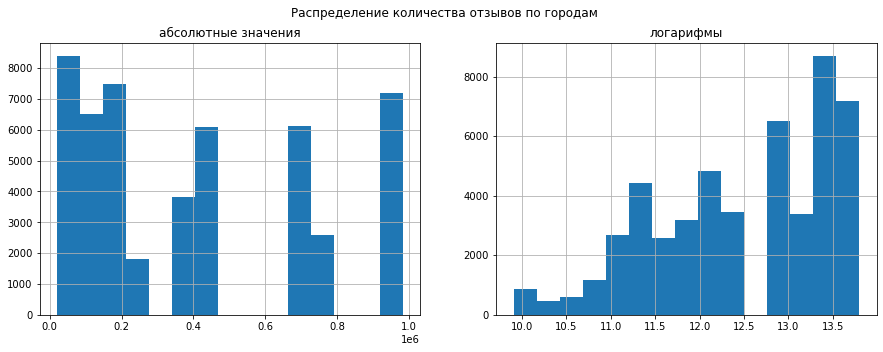

In [64]:
plot('n_rev_per_city', 'Распределение количества отзывов по городам')

Логарифмированные значения выделим в отдельный признак:

In [65]:
data['n_rev_per_city_log'] = data.n_rev_per_city.apply(np.log)

Создадим новый признак Ranking по количеству отзывово по городам:

In [66]:
data['rank_per_n_rev_per_city'] = data.ranking / data.n_rev_per_city

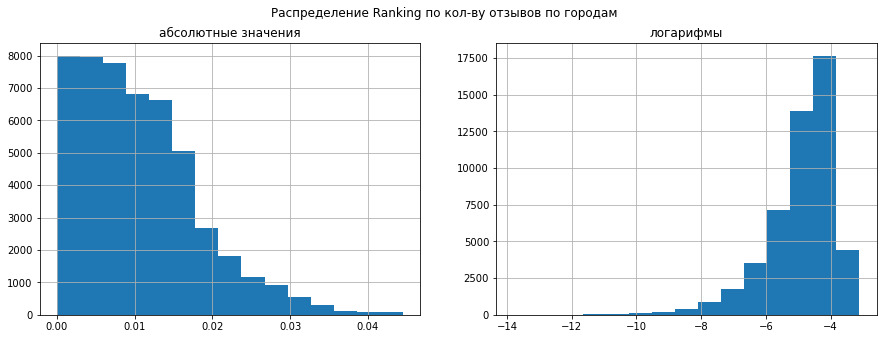

In [67]:
plot('rank_per_n_rev_per_city', 'Распределение Ranking по кол-ву отзывов по городам')

In [68]:
data['rank_per_n_rev_per_city_log'] = data.rank_per_n_rev_per_city.apply(
    np.log)

Создадим признак количество отзывов в городе к количеству ресторанов в городе:

In [69]:
data['n_rev_per_n_rest'] = data.n_rev_per_city / data.n_rest_per_city

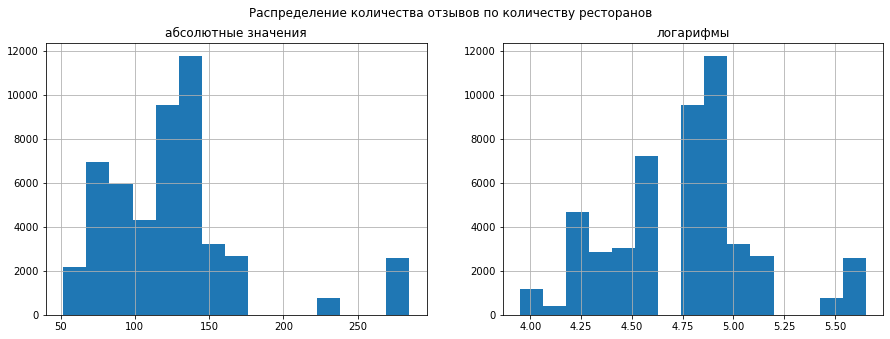

In [70]:
plot('n_rev_per_n_rest', 'Распределение количества отзывов по количеству ресторанов')

In [71]:
data['n_rev_per_n_rest_log'] = data.n_rev_per_n_rest.apply(np.log)

## Cuisine Style

В признаке достаточно много пропусков:

In [72]:
data.cuisine_style.isna().sum()

11590

Заполним пропуски значением "Другое" и представим данные в ячейках в виде списков:

In [73]:
data.cuisine_style.fillna("['Other']", inplace=True)
data.cuisine_style = data.cuisine_style.apply(lambda x: eval(x))

Количество уникальных видов кухонь:

In [74]:
pd.Series(data.cuisine_style.explode().unique()
          ).value_counts().sum()-1  # убираем из расчета ['Other']

125

20 самых популярных кухонь:

<AxesSubplot:title={'center':'Количество кухонь'}>

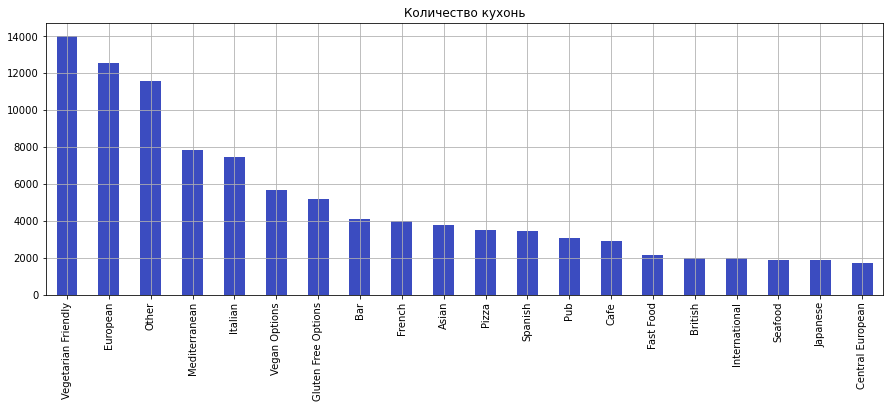

In [75]:
plt.figure(figsize=(15, 5))
data.explode('cuisine_style').cuisine_style.value_counts()[:20].plot(kind='bar',
                                                                     grid=True,
                                                                     colormap='coolwarm',
                                                                     title='Количество кухонь')

Для каждого города выберем наиболее часто встречающие в нем кухни: 

In [76]:
data1 = data.explode('cuisine_style')

In [77]:
cuisine_mode_per_city_dic = dict(data1.groupby(
    'city')['cuisine_style'].apply(lambda x: x.mode()[0]))

In [78]:
cuisine_mode_per_city_dic

{'Amsterdam': 'European',
 'Athens': 'Greek',
 'Barcelona': 'Spanish',
 'Berlin': 'Other',
 'Bratislava': 'Other',
 'Brussels': 'European',
 'Budapest': 'European',
 'Copenhagen': 'European',
 'Dublin': 'Vegetarian Friendly',
 'Edinburgh': 'Vegetarian Friendly',
 'Geneva': 'European',
 'Hamburg': 'Other',
 'Helsinki': 'European',
 'Krakow': 'European',
 'Lisbon': 'European',
 'Ljubljana': 'European',
 'London': 'Vegetarian Friendly',
 'Luxembourg': 'European',
 'Lyon': 'French',
 'Madrid': 'Spanish',
 'Milan': 'Italian',
 'Munich': 'Vegetarian Friendly',
 'Oslo': 'European',
 'Paris': 'French',
 'Porto': 'Portuguese',
 'Prague': 'European',
 'Rome': 'Italian',
 'Stockholm': 'European',
 'Vienna': 'European',
 'Warsaw': 'European',
 'Zurich': 'European'}

Создадим признак наиболее часто встречающаяся кухня в городе:

In [79]:
data['cuisine_mode_per_city'] = data.city.map(cuisine_mode_per_city_dic)

In [80]:
data['cuisine_mode_per_city'].value_counts()

European               14667
Vegetarian Friendly     9919
French                  7234
Spanish                 7208
Italian                 5283
Other                   4271
Greek                    776
Portuguese               642
Name: cuisine_mode_per_city, dtype: int64

Создадим dummies-признаки на основе этого списка:

In [81]:
data = pd.get_dummies(data, columns=['cuisine_mode_per_city'])

Определим количество кухонь в каждом ресторане:

In [82]:
data['cuisine_count'] = data.cuisine_style.apply(lambda x: len(x))

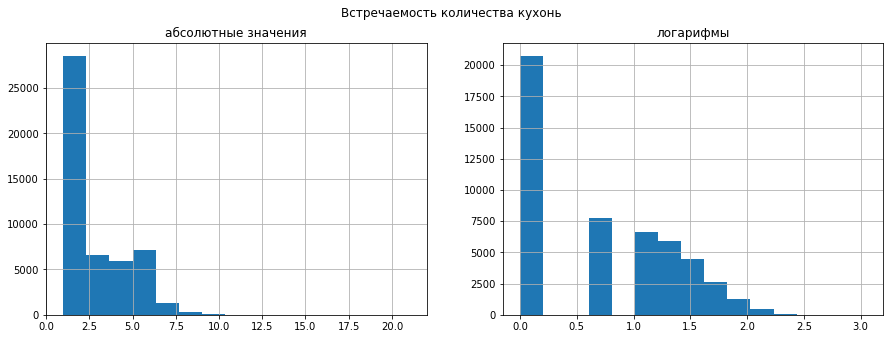

In [83]:
plot('cuisine_count', 'Встречаемость количества кухонь')

In [84]:
data['cuisine_count_log'] = data.cuisine_count.apply(np.log)

Создадим признак Ranking к количеству кухонь для каждого ресторана:

In [85]:
data['rank_per_n_cois_conut'] = data.ranking / data.cuisine_count

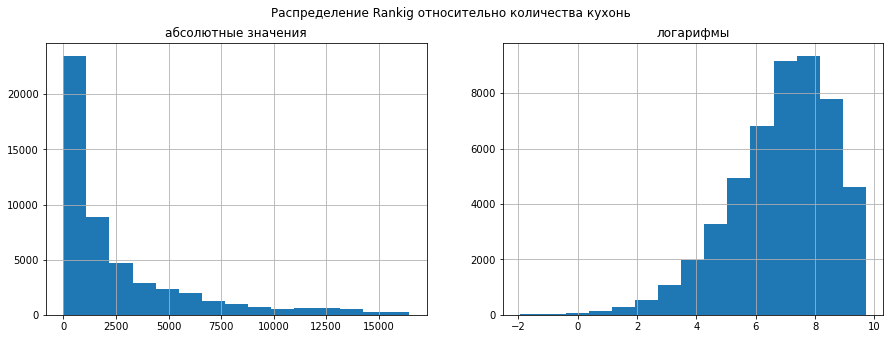

In [86]:
plot('rank_per_n_cois_conut', 'Распределение Rankig относительно количества кухонь')

In [87]:
data['rank_per_n_cois_conut_log'] = data.rank_per_n_cois_conut.apply(np.log)

Определим суммарное количество кухонь в каждом городе:

In [88]:
coisine_count_per_city_dic = dict(data.groupby('city')['cuisine_count'].sum())
data['coisine_count_per_city'] = data.city.map(coisine_count_per_city_dic)

In [89]:
data.coisine_count_per_city.unique()

array([13083,  1248,  2782, 21357,   847,  4375,  3347,  2594,  8271,
        6675,  2816,  2297,  5183,  3958,  2775,  9096,  3288,  8033,
        1506,  4557,  6158,  1843,  2028,  2374,  1747,  1739,  2216,
         721,  2062,  1534,   756], dtype=int64)

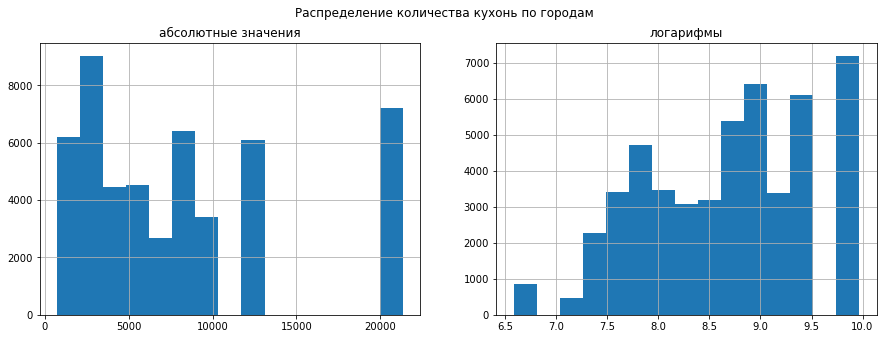

In [90]:
plot('coisine_count_per_city', 'Распределение количества кухонь по городам')

In [91]:
data['coisine_count_per_city_log'] = data.coisine_count_per_city.apply(np.log)

## Reviews

Посмотрим на содержимое колонки:

In [92]:
data.reviews

0                                                 [[], []]
1        [['Very good reviews!', 'Fine dining in Hakani...
2        [['Better than the Links', 'Ivy Black'], ['12/...
3        [['Most exquisite', 'Delicious and authentic']...
4        [['Always the best in bratislava', 'Very good ...
                               ...                        
49995    [['The real Italian experience!', 'Wonderful f...
49996    [['Parisian atmosphere', 'Bit pricey but inter...
49997    [['Good by swedish standards', 'A hidden jewel...
49998    [['Underground restaurant', 'Oldest Restaurant...
49999    [['Average', 'Nice an informal'], ['01/31/2016...
Name: reviews, Length: 50000, dtype: object

Очистим значения в признаке reviews и приведем их формат к списку:

In [93]:
data.reviews = data.reviews.apply(lambda x: None if x == '[[], []]' else x)
data.reviews = data.reviews.apply(lambda x: None if x == np.nan else x)
data.reviews = data.reviews.dropna().apply(
    lambda x: eval(x.replace('nan', '').replace('[,', "['',")))

Если первый и второй подсписки пусты, заполняем ячейку NaN:

In [94]:
data.reviews = data.reviews.dropna().apply(
    lambda x: np.nan if len(x[0]) == 0 & len(x[1]) == 0 else x)

Выделим часть списка с датами и разобьем его на два признака:

In [95]:
data['date'] = data.reviews.dropna().apply(lambda x: x[1])
data['date1'] = data.date.dropna().apply(
    lambda x: x[1] if len(x) == 2 else np.nan)
data['date2'] = data.date.dropna().apply(
    lambda x: x[0] if len(x) > 0 else np.nan)

Переведем даты в формат DateTime:

In [96]:
data.date1 = pd.to_datetime(data.date1)
data.date2 = pd.to_datetime(data.date2)

Заполним пропущенные значения минимумом для даты первого отзыва и средним (дает наилучшие значения метрики) для даты второго:

In [97]:
data.date1.fillna(data.date1.min(), inplace=True)
data.date2.fillna(data.date2.mean(), inplace=True)

In [98]:
len(data.date1)

50000

Выделим в признак разницу между первым и вторым отзывом:

In [99]:
data['rev_delta'] = abs(data.date2 - data.date1).dt.days

In [100]:
data['rev_delta'].isna().sum()

0

<AxesSubplot:>

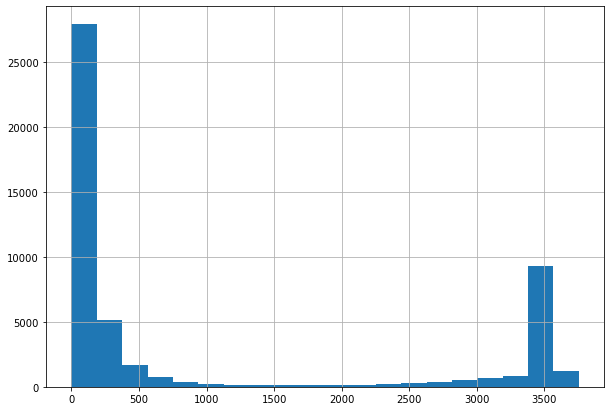

In [101]:
plt.rcParams['figure.figsize'] = (10, 7)
data['rev_delta'].hist(bins=20)

In [102]:
data.rev_delta[data.rev_delta > 1000].value_counts().sum()

14223

Часть дельт получилась нулевой, даты первого и второго отзывово сопадают.

In [103]:
pd.options.display.max_colwidth = 200
data.loc[(data.rev_delta == 0)][['reviews']]

,reviews
37,"[[Great atmosphere, great food, Brunch], [01/07/2018, 01/07/2018]]"
235,"[[Lovely place - I fell in love :), Addiction at first bite!], [01/08/2017, 01/08/2017]]"
247,"[[Superb find!, Lovely food], [01/04/2018, 01/04/2018]]"
255,"[[Modern Czech Cuisine, Seasonal products - modern cuisine for rea...], [01/03/2018, 01/03/2018]]"
476,"[[Rude staff, Yum yum yummy], [01/08/2018, 01/08/2018]]"
...,...
49672,"[[Nice and cozy place with tasteful, Elegant and cozy italian café!], [11/02/2017, 11/02/2017]]"
49702,"[[Well for a man made beach not bad, Great place for a sunny Sunday], [08/27/2017, 08/27/2017]]"
49768,"[[Lucky Choice, Well worth a visit!], [01/07/2018, 01/07/2018]]"
49803,"[[Not worth visiting, Bad feeling], [10/31/2017, 10/31/2017]]"


Если отбросить максимальные разрывы в датах, то получится практически логнормально распределенная переменная.

<AxesSubplot:>

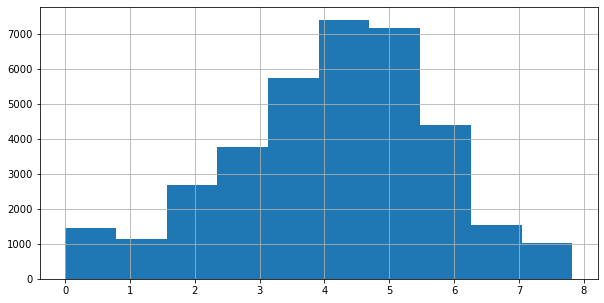

In [104]:
plt.figure(figsize=(10, 5))
data.rev_delta[(data.rev_delta > 0) & (
    data.rev_delta < 2500)].apply(np.log).hist(bins=10)

Добавим в новый признак логаримы дельт для ненулевых значений:

In [105]:
data['rev_delta_log'] = data.rev_delta.apply(
    lambda x: np.log(x) if x > 0 else x)

In [106]:
data['ranking_per_rev_delta'] = data.ranking / \
    data.rev_delta.apply(lambda x: data.rev_delta.mean() if x == 0 else x)

Добавим признак Ranking к дельте между отзывами:

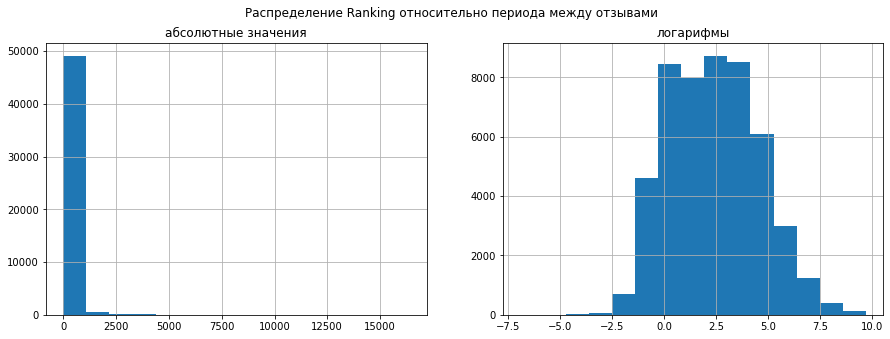

In [107]:
plot('ranking_per_rev_delta',
     'Распределение Ranking относительно периода между отзывами')

In [108]:
data['ranking_per_rev_delta_log'] = data['ranking_per_rev_delta'].apply(np.log)

## City population

Подгрузим данные о населении городов.

In [109]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41001 entries, 0 to 41000
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        41001 non-null  object 
 1   city_ascii  41001 non-null  object 
 2   lat         41001 non-null  float64
 3   lng         41001 non-null  float64
 4   country     41001 non-null  object 
 5   iso2        40970 non-null  object 
 6   iso3        41001 non-null  object 
 7   admin_name  40902 non-null  object 
 8   capital     9483 non-null   object 
 9   population  40263 non-null  float64
 10  id          41001 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 3.4+ MB


In [110]:
df_city.sample(10)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
33035,Paulo Jacinto,Paulo Jacinto,-9.3658,-36.3700,Brazil,BR,BRA,Alagoas,NaN,7682.0,1076001928
23083,Pargas,Pargas,60.3000,22.3000,Finland,FI,FIN,Varsinais-Suomi,minor,15457.0,1246990890
7958,San Ignacio,San Ignacio,17.1588,-89.0696,Belize,BZ,BLZ,Cayo,admin,16977.0,1084924884
6092,Talence,Talence,44.8000,-0.5840,France,FR,FRA,Nouvelle-Aquitaine,NaN,42606.0,1250490677
26261,Vosselaar,Vosselaar,51.3081,4.8883,Belgium,BE,BEL,Flanders,NaN,11159.0,1056845357
4693,La Piedad,La Piedad,20.3333,-102.0167,Mexico,MX,MEX,Michoacán de Ocampo,minor,99837.0,1484779296
30113,Svit,Svit,49.0583,20.2025,Slovakia,SK,SVK,Prešovský,NaN,7624.0,1703210837
23484,Bni Darkoul,Bni Darkoul,35.0563,-5.0688,Morocco,MA,MAR,Tanger-Tétouan-Al Hoceïma,NaN,14779.0,1504747977
32317,Oak Hill,Oak Hill,37.9844,-81.1277,United States,US,USA,West Virginia,NaN,8098.0,1840006297
26972,Roca Sales,Roca Sales,-29.2839,-51.8678,Brazil,BR,BRA,Rio Grande do Sul,NaN,11471.0,1076512734


Некоторые названия городов встречаются по нескольку раз.

In [111]:
df_city.loc[(df_city.city_ascii == 'Porto')]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
2434,Porto,Porto,41.1495,-8.6108,Portugal,PT,PRT,Porto,admin,237591.0,1620356810
25624,Porto,Porto,-3.8928,-42.7100,Brazil,BR,BRA,Piauí,NaN,12608.0,1076285535


Создадим список городов:

In [112]:
city_list = data.city.unique()

In [113]:
df_city = df_city[(df_city.city_ascii.isin(city_list))]

В нашем датасете города должны встречаться по одному разу. Здесь же их по 6, по 5 и т.д. В странах Нового Света практикуется использовать названия городов Старого. 

In [114]:
df_city.city_ascii.value_counts()

Paris         6
Athens        6
Berlin        5
Geneva        4
Vienna        4
London        4
Dublin        4
Lisbon        3
Barcelona     3
Milan         3
Rome          3
Hamburg       2
Madrid        2
Amsterdam     2
Warsaw        2
Porto         2
Munich        1
Prague        1
Bratislava    1
Brussels      1
Stockholm     1
Zurich        1
Copenhagen    1
Ljubljana     1
Krakow        1
Lyon          1
Oslo          1
Helsinki      1
Edinburgh     1
Budapest      1
Luxembourg    1
Name: city_ascii, dtype: int64

In [115]:
df_city.country.value_counts()

United States     34
Germany            3
France             2
Italy              2
Switzerland        2
Poland             2
Spain              2
United Kingdom     2
Portugal           2
Norway             1
Brazil             1
Hungary            1
Czechia            1
Philippines        1
Belgium            1
Slovenia           1
Luxembourg         1
Venezuela          1
Denmark            1
Sweden             1
Netherlands        1
Ireland            1
Colombia           1
Greece             1
Finland            1
Austria            1
Slovakia           1
Canada             1
Name: country, dtype: int64

Выбросим из анализа страны Северной, Южной Америки и Филиппин (на всякий случай):

In [116]:
countries_to_drop = ['United States', 'Colombia',
                     'Venezuela', 'Philippines', 'Brazil', 'Canada']
for i in countries_to_drop:
    df_city.country = df_city.country.apply(lambda x: None if x == i else x)
df_city.dropna(subset=['country'], inplace=True)

У нас остались только европейские страны.

In [117]:
df_city.country.value_counts()

Germany           3
France            2
United Kingdom    2
Spain             2
Italy             2
Switzerland       2
Poland            2
Portugal          2
Slovenia          1
Netherlands       1
Denmark           1
Sweden            1
Czechia           1
Hungary           1
Ireland           1
Belgium           1
Slovakia          1
Greece            1
Luxembourg        1
Norway            1
Finland           1
Austria           1
Name: country, dtype: int64

И каждый город из нашего списка представлен в единственном экземпляре:

In [118]:
df_city.city_ascii.value_counts()

Luxembourg    1
Geneva        1
Berlin        1
Edinburgh     1
Barcelona     1
Hamburg       1
Milan         1
Madrid        1
Rome          1
Copenhagen    1
Paris         1
Stockholm     1
Amsterdam     1
Bratislava    1
Warsaw        1
Porto         1
Munich        1
Dublin        1
Athens        1
Prague        1
Brussels      1
Zurich        1
Ljubljana     1
Krakow        1
Lyon          1
London        1
Oslo          1
Helsinki      1
Vienna        1
Budapest      1
Lisbon        1
Name: city_ascii, dtype: int64

In [119]:
df_city.sample(5)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
541,Prague,Prague,50.0833,14.4167,Czechia,CZ,CZE,"Praha, Hlavní Město",primary,1335084.0,1203744823
803,Luxembourg,Luxembourg,49.6106,6.1328,Luxembourg,LU,LUX,Luxembourg,primary,124509.0,1442262731
435,Budapest,Budapest,47.4983,19.0408,Hungary,HU,HUN,Budapest,primary,1752286.0,1348611435
417,Hamburg,Hamburg,53.5500,10.0000,Germany,DE,DEU,Hamburg,admin,1841179.0,1276041799
101,Madrid,Madrid,40.4167,-3.7167,Spain,ES,ESP,Madrid,primary,6026000.0,1724616994


Убираем ненужные колонки.

In [120]:
df_city.drop(['city', 'lat', 'lng', 'country', 'iso2', 'iso3',
             'admin_name', 'capital', 'id'], axis=1, inplace=True)

Присоединяем данные о населении городов к нашему датасету:

In [121]:
data = data.join(df_city.set_index('city_ascii'), on='city')

In [122]:
data.population.shape

(50000,)

Приводим данные о популяции к значениям в млн.жителей.

In [123]:
data.population = round((data.population / 1000000), 2)

Создаем признак "количество ресторанов в городе к населению города":

In [124]:
data['n_rest_per_city_per_pop'] = data.n_rest_per_city / data.population

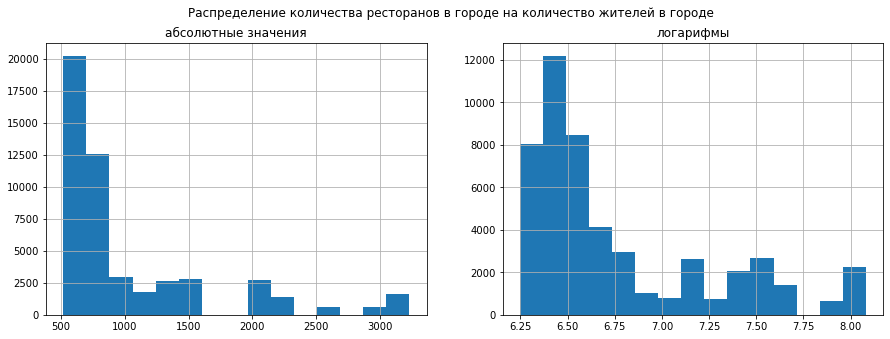

In [125]:
plot('n_rest_per_city_per_pop',
     'Распределение количества ресторанов в городе на количество жителей в городе')

In [126]:
data['n_rest_per_city_per_pop_log'] = data['n_rest_per_city_per_pop'].apply(
    np.log)

Создаем признак Ranking к населению города:

In [127]:
data['ranking_per_population'] = data.ranking / data.population

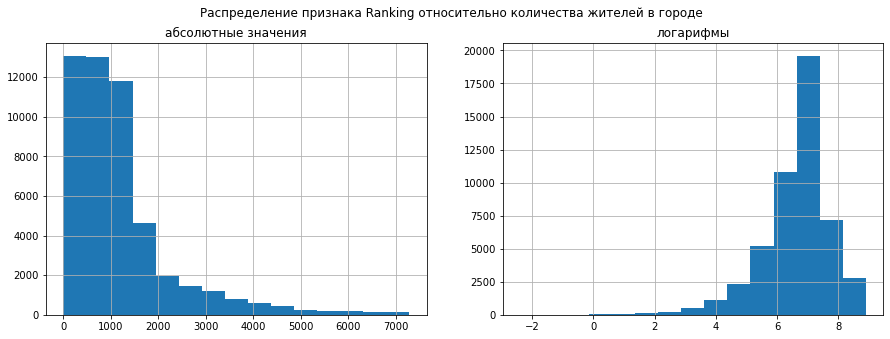

In [128]:
plot('ranking_per_population',
     'Распределение признака Ranking относительно количества жителей в городе')

In [129]:
data['ranking_per_population_log'] = data['ranking_per_population'].apply(
    np.log)

Создаем признак "средний Ranking в горде к населению города":

In [130]:
data['mean_ranking_per_city_per_pop'] = data.mean_ranking_per_city / data.population

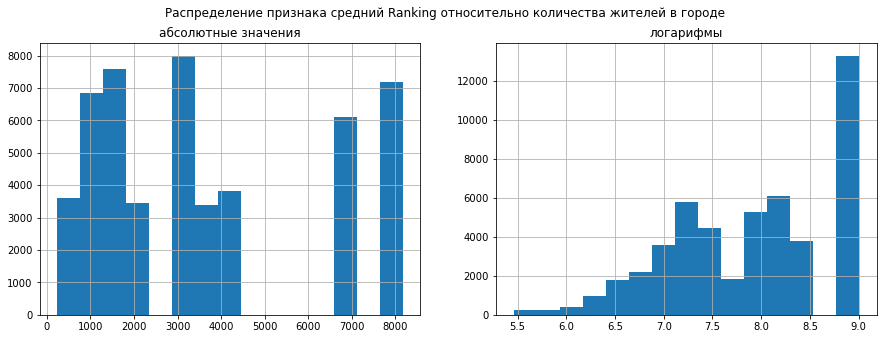

In [131]:
plot('mean_ranking_per_city',
     'Распределение признака средний Ranking относительно количества жителей в городе')

In [132]:
data['mean_ranking_per_city_per_pop_log'] = data['mean_ranking_per_city_per_pop'].apply(
    np.log)

Создаем признак "количество отзывово к населению":

In [133]:
data['number_of_reviews_per_pop'] = data.number_of_reviews / data.population

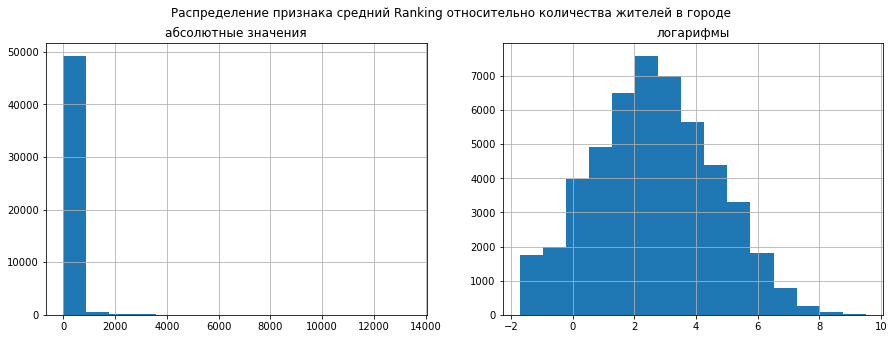

In [134]:
plot('number_of_reviews_per_pop',
     'Распределение признака средний Ranking относительно количества жителей в городе')

In [135]:
# data['number_of_reviews_per_pop_log'] = data['number_of_reviews_per_pop'].apply(np.log)
# Данный признак ухудшает метрику, в анализе его не используем

## Rating

<AxesSubplot:>

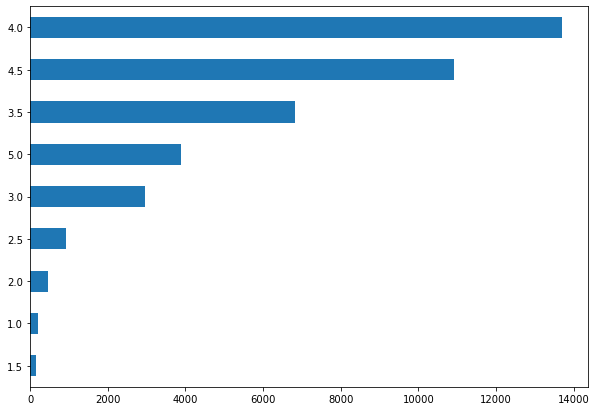

In [136]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

In [137]:
df_train['Rating'].describe()

count    40000.000000
mean         3.993037
std          0.668417
min          1.000000
25%          3.500000
50%          4.000000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

# Выбор данных для моделирования

Итого, в нашем датасете набралось 93 признака:

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 92 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   restaurant_id                              50000 non-null  float64       
 1   city                                       50000 non-null  object        
 2   cuisine_style                              50000 non-null  object        
 3   ranking                                    50000 non-null  float64       
 4   number_of_reviews                          50000 non-null  float64       
 5   reviews                                    41886 non-null  object        
 6   url_ta                                     50000 non-null  object        
 7   id_ta                                      50000 non-null  float64       
 8   sample                                     50000 non-null  int64         
 9   rating           

Удалим признаки, не относящиеся к числовым:

In [139]:
df_preproc = preproc_data(data)
df_preproc.isna().sum()

restaurant_id                        0
ranking                              0
number_of_reviews                    0
id_ta                                0
sample                               0
                                    ..
ranking_per_population               0
ranking_per_population_log           0
mean_ranking_per_city_per_pop        0
mean_ranking_per_city_per_pop_log    0
number_of_reviews_per_pop            0
Length: 85, dtype: int64

In [140]:
# for col in df_preproc.columns:
#    pct_missing = df_preproc[col].isna().mean()
#    print(f'{col} - {pct_missing :.1%}')

In [141]:
# for col in df_preproc.columns:
#    minimum = df_preproc[col].min()
#    maximum = df_preproc[col].max()
#    print(f'{col} : {minimum} - {maximum}')

Поиграем разными комбинациями признаков (в принципе, есть методы, которые позволяют автоматизировать данный процесс, но это пока еще в будущем):

In [142]:
l1 = l2 = l3 = l4 = l5 = l6 = clmns = []
l1 = df_preproc.columns.values.tolist()
l2 = [i for i in l1 if 'log' in i]  # логарифированные признаки
l7 = [i for i in l1 if not 'log' in i]  # все, кроме логарифмов
l3 = [i for i in l1 if 'dum' in i]  # dummies с городами
l4 = [i for i in l1 if 'mode' in i]  # dummies с видами кухонь
l5 = ['sample', 'rating']
l6 = ['price_range_1.0', 'price_range_2.0', 'price_range_3.0', 'chain_1.0']
# clmns = l2 + l5 + l3  # MAE: 0.19951624999999998
# clmns = l7 + l5 + l3 + l4  # MAE: 0.19924125000000092 со стандартизацией
# clmns = l7  # MAE: 0.1994125 со стандартизацией
# clmns = l7 # MAE: 0.19926062499999997 с новым признаком n_rev_per_n_rest
# clmns = l2 + l5 + l3  # MAE: 0.19944374999999998 со стандартизацией
# clmns = l2 + l5 + l3  #MAE: 0.199433125 без стандартизации
# clmns = l2 + l5 + l3  #MAE: 0.19943187499999998
# clmns = l7  # MAE: 0.19906687499999998 со стандартизацией
# clmns = l7  #MAE: 0.19931562500000002 без стандартизации
# clmns = l1  #MAE: 0.19932999999999998 со стандартизацией
# clmns = l1  #MAE: 0.19928312499999998 со стандартизацией
# clmns = l7  #MAE: 0.199251875 со стандартизацией
# clmns = l2 + l5 + l3 + l4 #MAE: 0.19920687499999998 без стандартизации
# clmns = l2 + l5 + l3 + l4 + l6 # MAE: 0.1668125 без стандартизации   !!!
# clmns = l7  # MAE: 0.1675625 без стандартизации
# clmns = l7  #MAE: 0.16775 со стандартизацией

# Остановимся на логорифмированных признаках, категориях и dummies:
clmns = l2 + l5 + l3 + l4 + l6

df_preproc = df_preproc[clmns]

In [143]:
len(clmns)

64

# Корреляционный анализ и главные компоненты

Проверим корреляцию непрерывных признаков:

<AxesSubplot:>

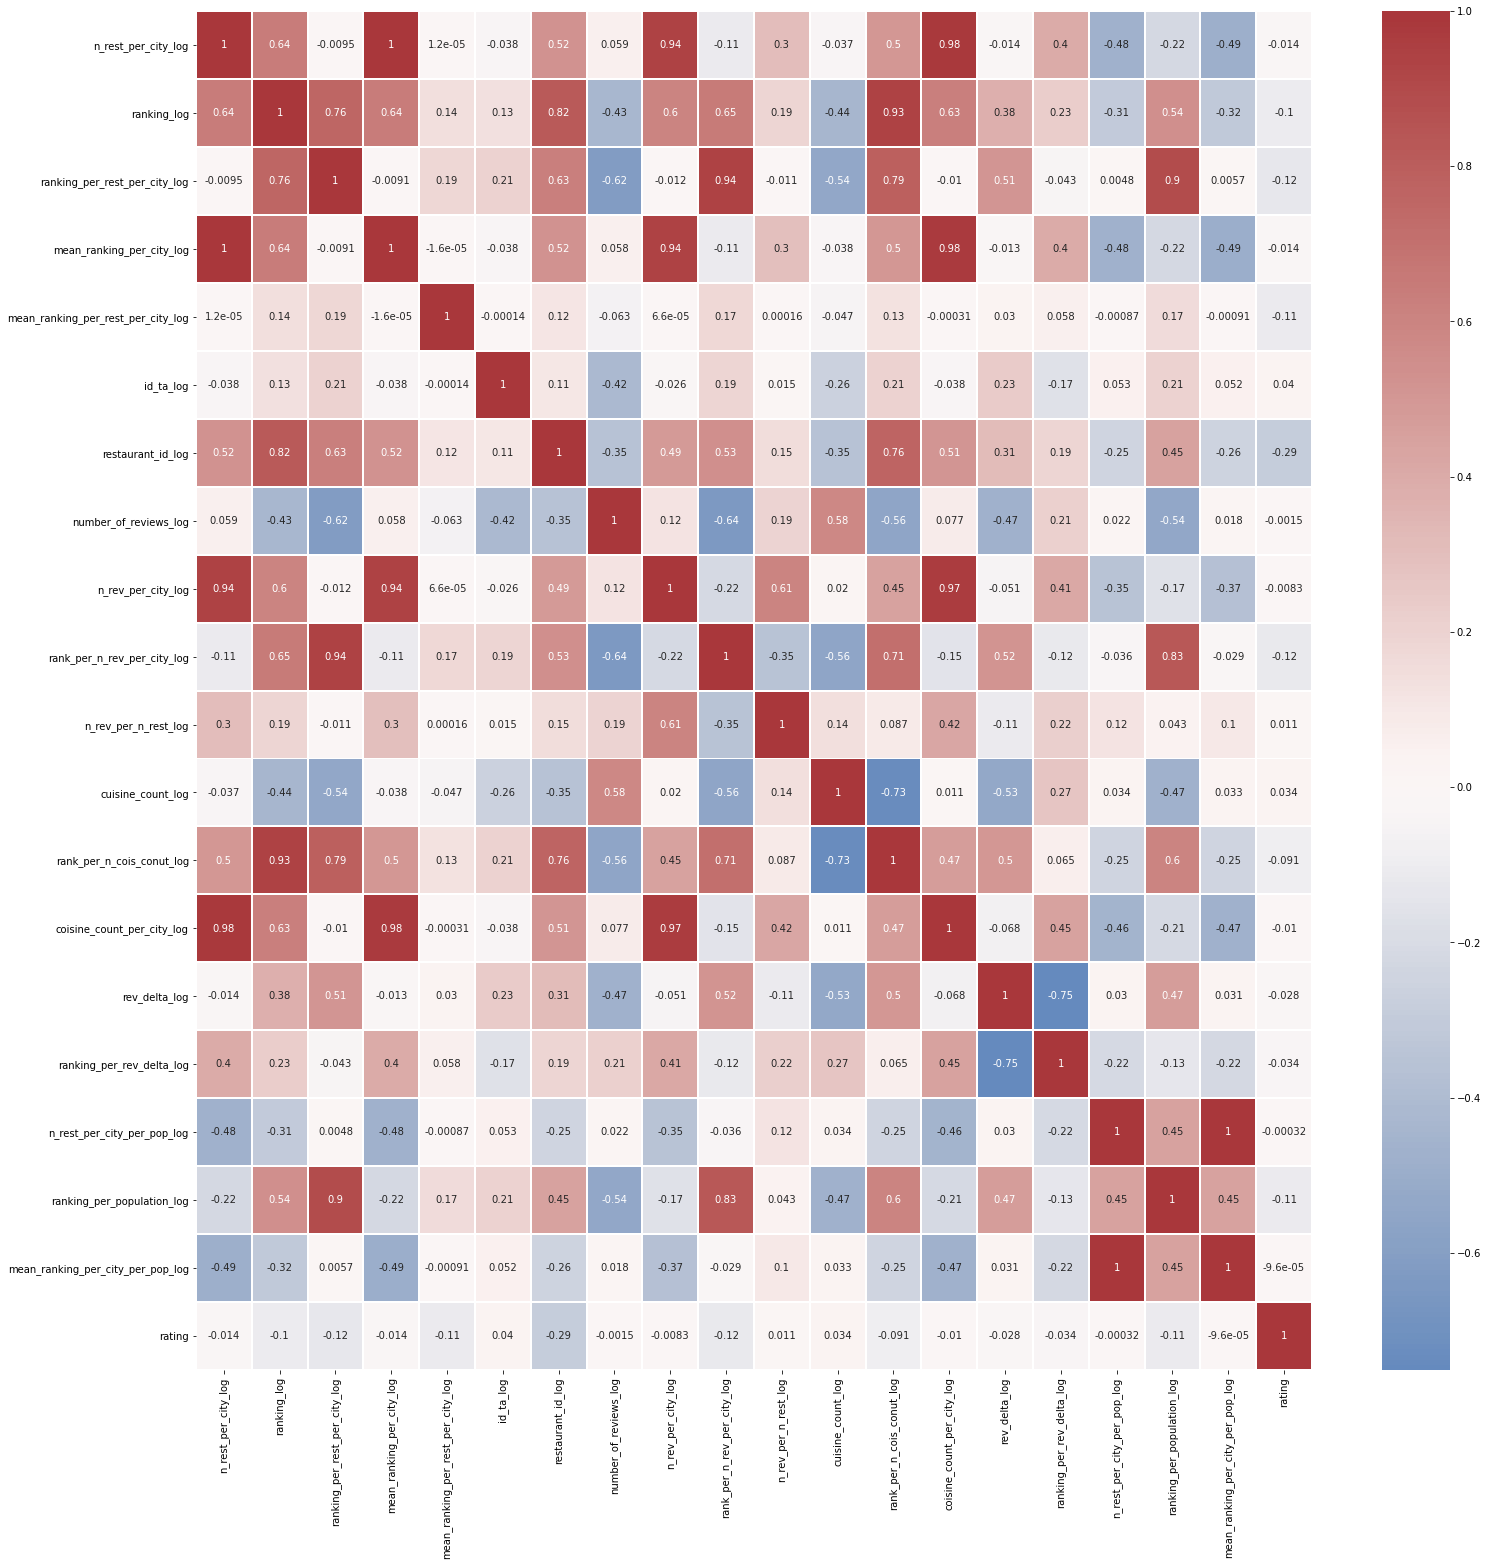

In [144]:
cor = data[l2+l5].drop('sample', axis=1).corr()
ax = plt.subplots(figsize=(25, 25))
sns.heatmap(cor, annot=True, cmap='vlag', linewidths=1, center=0)

На целевую переменную признаки оказывают малое линейное влияние. Однако, между собой некоторые признаки линейно зависимы.

Выделим пары линейно зависимых признаков, у которых коэффициент корреляции превышает 0.9:

In [145]:
collin = identify_collinear(0.9)
collin

<ipython-input-16-93e51c08b38e>:52: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


,drop_feature,corr_feature,corr_value
0,mean_ranking_per_city_log,n_rest_per_city_log,0.999747
1,n_rev_per_city_log,n_rest_per_city_log,0.941739
2,n_rev_per_city_log,mean_ranking_per_city_log,0.939107
3,rank_per_n_rev_per_city_log,ranking_per_rest_per_city_log,0.941329
4,rank_per_n_cois_conut_log,ranking_log,0.932675
5,coisine_count_per_city_log,n_rest_per_city_log,0.979950
6,coisine_count_per_city_log,mean_ranking_per_city_log,0.978935
7,coisine_count_per_city_log,n_rev_per_city_log,0.967266
8,mean_ranking_per_city_per_pop_log,n_rest_per_city_per_pop_log,0.999112


Взаимозависимые признаки нужно удалить. Создадим их список.

In [146]:
cols_to_drop = list(identify_collinear(0.9).drop_feature.unique())
cols_to_drop

<ipython-input-16-93e51c08b38e>:52: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


['mean_ranking_per_city_log',
 'n_rev_per_city_log',
 'rank_per_n_rev_per_city_log',
 'rank_per_n_cois_conut_log',
 'coisine_count_per_city_log',
 'mean_ranking_per_city_per_pop_log']

Заменим пары скоррелированных признаков главными компанентами. По одной на каждую пару:

In [147]:
df = pd.DataFrame()
for i, row in collin.iterrows():
    col1 = collin.drop_feature[i]
    col2 = collin.corr_feature[i]
    pc = pd.DataFrame(pc_compr(col1, col2))
    df = pd.concat([pc, df], axis=1)
    df.rename(columns={0: f'PC{i}'}, inplace=True)

In [148]:
df

,PC8,PC7,PC6,PC5,PC4,PC3,PC2,PC1,PC0
0,-0.684217,-1.241622,-1.215356,-1.228147,-2.652939,-1.285024,-1.350579,-1.362113,-1.349185
1,-0.239621,2.631873,2.220788,2.240375,4.806913,1.512520,2.623849,2.640649,2.231319
2,0.774691,0.829531,1.336023,1.357220,0.669572,0.167652,1.042935,1.064271,1.594694
3,-0.447961,-1.798643,-1.676956,-1.688514,0.950575,1.956992,-1.701076,-1.712248,-1.580298
4,0.024376,3.140172,2.635308,2.671331,6.425771,2.599517,3.012936,3.044736,2.529892
...,...,...,...,...,...,...,...,...,...
49995,1.117152,-0.451773,-0.171007,-0.172728,2.457677,2.413504,-0.478362,-0.478461,-0.201989
49996,-0.684217,-1.241622,-1.215356,-1.228147,-0.916796,-0.274366,-1.350579,-1.362113,-1.349185
49997,0.277027,1.467946,1.148019,1.173444,0.229111,-1.177205,1.425997,1.447974,1.126674
49998,-0.780327,1.673125,1.323459,1.314310,2.289327,-0.055210,1.675900,1.666752,1.317240


Получившиеся главные компоненты также проявляют сильную линейную зависимость друг с другом:

<AxesSubplot:>

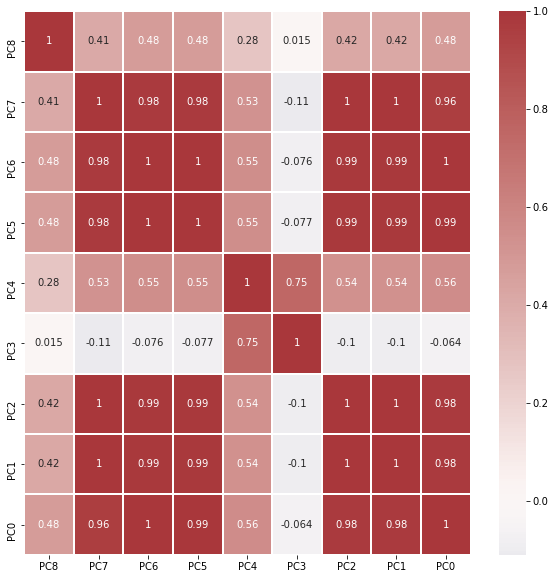

In [149]:
cor = df.corr()
ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cor, annot=True, cmap='vlag', linewidths=1, center=0)

Присоединим столбцы главных компонент к нашем датасету:

In [150]:
df_preproc1 = pd.concat([df_preproc, df], axis=1)
df_preproc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 73 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   n_rest_per_city_log                        50000 non-null  float64
 1   ranking_log                                50000 non-null  float64
 2   ranking_per_rest_per_city_log              50000 non-null  float64
 3   mean_ranking_per_city_log                  50000 non-null  float64
 4   mean_ranking_per_rest_per_city_log         50000 non-null  float64
 5   id_ta_log                                  50000 non-null  float64
 6   restaurant_id_log                          50000 non-null  float64
 7   number_of_reviews_log                      50000 non-null  float64
 8   n_rev_per_city_log                         50000 non-null  float64
 9   rank_per_n_rev_per_city_log                50000 non-null  float64
 10  n_rev_per_n_rest_log  

Удалим скоррелированные исходные признаки.

In [151]:
df_preproc1 = df_preproc1.drop(cols_to_drop, axis=1)

Составим список колонок, содержащих не непрерывные переменные:

In [152]:
lst = df_preproc1.columns[(~pd.Series(
    df_preproc1.columns).str.contains('dum|price|chain|sample'))]

Построим корреляционную матрицу для непрерывных переменных:

<AxesSubplot:>

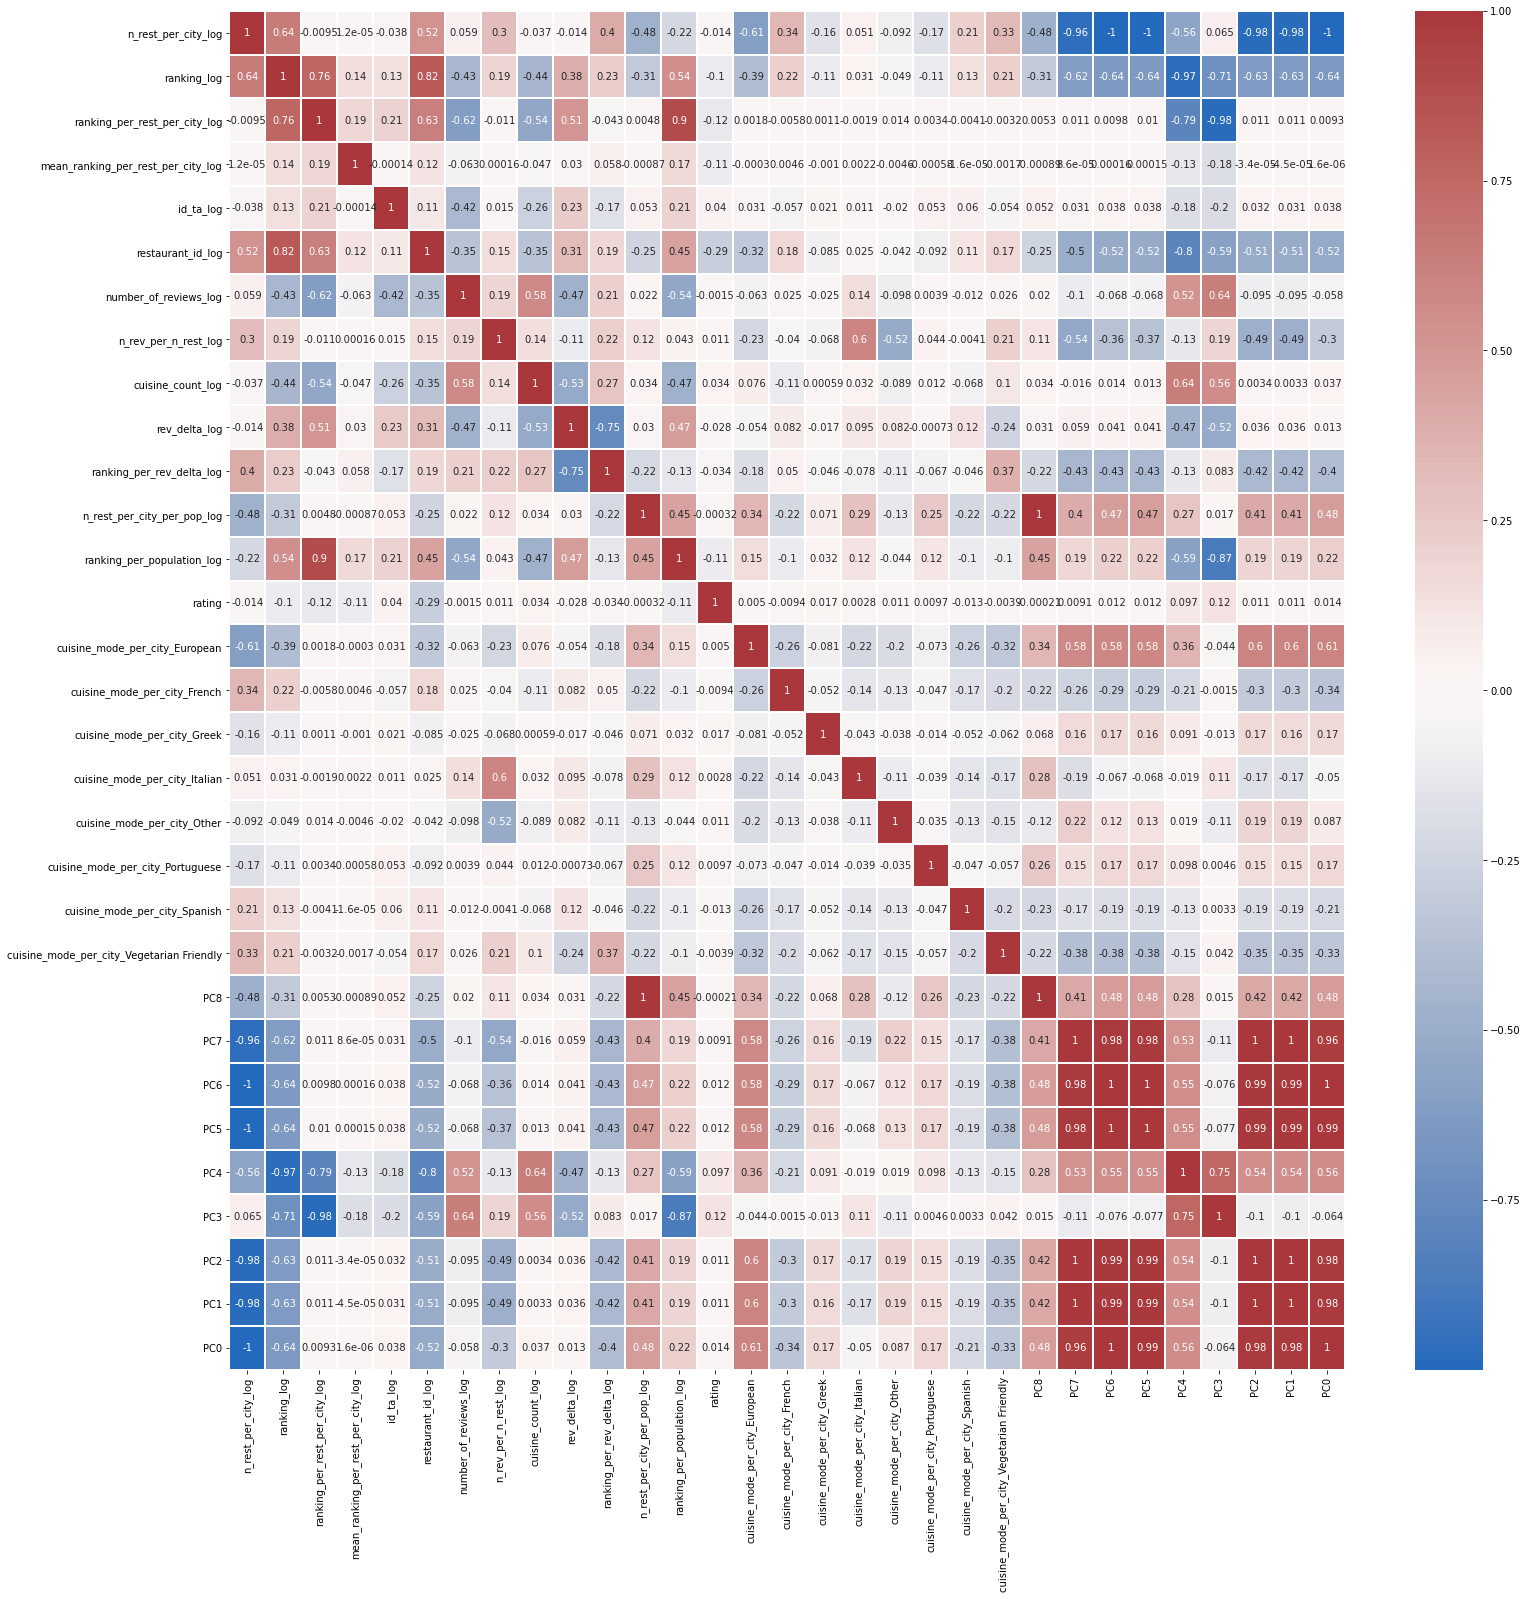

In [153]:
cor = df_preproc1[lst].corr()
ax = plt.subplots(figsize=(25, 25))
sns.heatmap(cor, annot=True, cmap='vlag', linewidths=1, center=0)

После всех манипуляциий с зависимыми признаками лучший MAE получился 0.1698125, т.е. на 0.003 хуже, чем до проведения корреляционного анализа.

Получается для данной метрики важно не качество, а количество признаков.


Вернемся к исходному списку с логарифмированными данными, dummies и оценками.


# Моделирование

In [154]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.rating.values            # наш таргет
X = train_data.drop(['rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [155]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED)

# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 63), (40000, 63), (40000, 62), (32000, 62), (8000, 62))

In [156]:
# попытки стандартизации также не привели улучшению метрики
#ss = StandardScaler()
#X_train = ss.fit_transform(X_train)
#X_test = ss.transform(X_test)
# y_train = np.array(y_train)

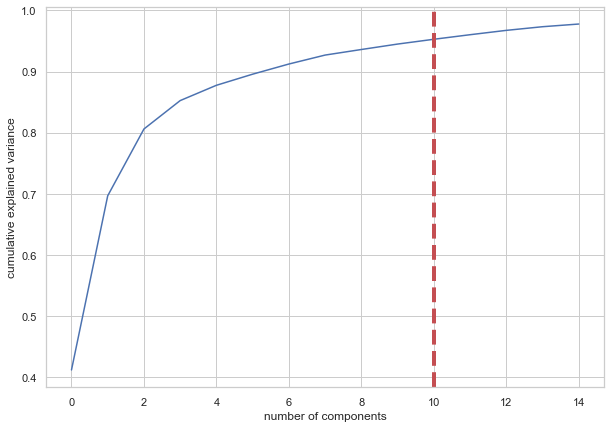

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.411869,0.411869
1,0.696755,0.284886
2,0.806031,0.109276
3,0.852471,0.046440
4,0.877488,0.025017
5,0.895665,0.018176
6,0.912280,0.016615
7,0.926908,0.014628
8,0.936013,0.009105
9,0.944908,0.008895


In [157]:
from sklearn.decomposition import PCA
pca_test = PCA(n_components=15)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle='--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [158]:
# Сжатие поля признаков до 10 гланых компонент, которые описывают более 95% исходного датасета, приводит сильному ухудшению МАЕ
#pca = PCA(n_components=20)
# pca.fit(X_train)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

# Model 
Сам ML

In [159]:
# Импортируем необходимые библиотеки:
# инструмент для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  # инструменты для оценки точности модели

In [160]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(
    n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [161]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

# Округлим предсказанные значения до степени округления целевой переменной


def round_pred(prediction):
    if prediction < 0.25:
        return 0
    elif 0.25 < prediction <= 0.75:
        return 0.5
    elif 0.75 < prediction <= 1.25:
        return 1
    elif 1.25 < prediction <= 1.75:
        return 1.5
    elif 1.75 < prediction <= 2.25:
        return 2
    elif 2.25 < prediction <= 2.75:
        return 2.5
    elif 2.75 < prediction <= 3.25:
        return 3
    elif 3.25 < prediction <= 3.75:
        return 3.5
    elif 3.75 < prediction <= 4.25:
        return 4
    elif 4.25 < prediction <= 4.75:
        return 4.5
    else:
        return 5


for i in range(y_pred.size):
    y_pred[i] = round_pred(y_pred[i])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [162]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.16525


Коэффициент детерминации показывает, что модель объясняет 76% целевой переменной:

In [163]:
R2 = metrics.r2_score(y_test, y_pred)
print(round(R2, 2))

0.76


<AxesSubplot:>

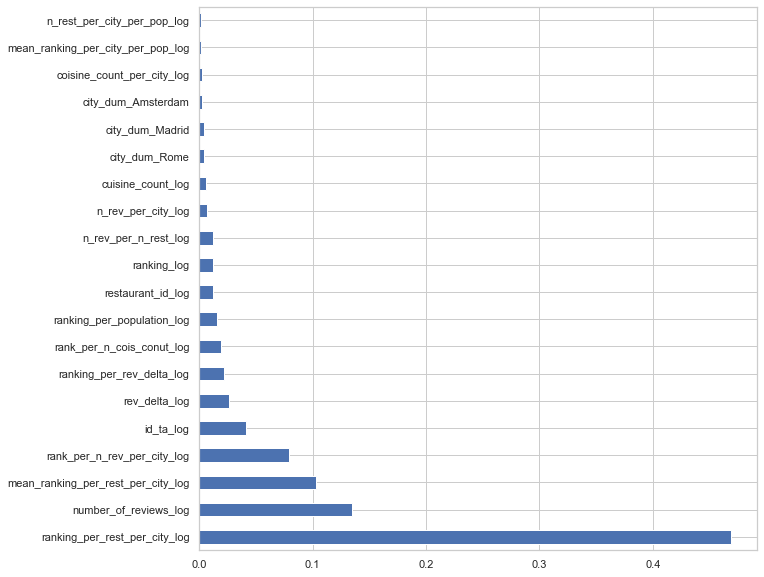

In [164]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10, 10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [165]:
feat_importances_list = list(feat_importances.nlargest(20).index)

In [166]:
feat_importances_list

['ranking_per_rest_per_city_log',
 'number_of_reviews_log',
 'mean_ranking_per_rest_per_city_log',
 'rank_per_n_rev_per_city_log',
 'id_ta_log',
 'rev_delta_log',
 'ranking_per_rev_delta_log',
 'rank_per_n_cois_conut_log',
 'ranking_per_population_log',
 'restaurant_id_log',
 'ranking_log',
 'n_rev_per_n_rest_log',
 'n_rev_per_city_log',
 'cuisine_count_log',
 'city_dum_Rome',
 'city_dum_Madrid',
 'city_dum_Amsterdam',
 'coisine_count_per_city_log',
 'mean_ranking_per_city_per_pop_log',
 'n_rest_per_city_per_pop_log']

# Submission
Если все устраевает - готовим Submission на кагл

In [167]:
test_data.sample(10)

,n_rest_per_city_log,ranking_log,ranking_per_rest_per_city_log,mean_ranking_per_city_log,mean_ranking_per_rest_per_city_log,id_ta_log,restaurant_id_log,number_of_reviews_log,n_rev_per_city_log,rank_per_n_rev_per_city_log,...,cuisine_mode_per_city_Greek,cuisine_mode_per_city_Italian,cuisine_mode_per_city_Other,cuisine_mode_per_city_Portuguese,cuisine_mode_per_city_Spanish,cuisine_mode_per_city_Vegetarian Friendly,price_range_1.0,price_range_2.0,price_range_3.0,chain_1.0
8917,6.928538,7.441320,0.512783,7.105837,-0.742456,15.741829,9.095715,3.044522,11.973078,-4.531757,...,0,0,0,0,0,0,0,1,0,0
520,8.246172,9.063695,0.817523,8.386746,0.107910,15.402266,6.253829,4.248495,12.861104,-3.797410,...,0,0,0,0,1,0,0,1,0,1
7985,7.504392,5.937536,-1.566855,7.643473,-0.940517,15.753702,8.985320,5.123964,12.320903,-6.383366,...,0,0,0,0,0,0,1,0,0,1
752,6.190315,6.530878,0.340562,6.314580,-1.296736,16.157320,6.622736,2.484907,10.803179,-4.272302,...,0,0,0,0,0,0,0,1,0,1
8012,8.246172,8.381603,0.135431,8.386746,-0.005905,16.369697,8.988696,1.098612,12.861104,-4.479502,...,0,0,0,0,1,0,0,1,0,1
988,7.902857,8.049746,0.146889,8.088076,-0.045256,15.698141,6.895683,2.079442,12.135401,-4.085655,...,0,0,1,0,0,0,0,1,0,1
5285,6.654153,6.916715,0.262563,6.780165,-1.796000,15.970378,8.572628,3.044522,11.214550,-4.297835,...,1,0,0,0,0,0,1,0,0,1
6123,8.246172,8.871786,0.625614,8.386746,-0.330647,15.393274,8.719807,1.386294,12.861104,-3.989318,...,0,0,0,0,1,0,0,1,0,1
3933,7.274480,5.501258,-1.773221,7.444994,-1.016130,14.225441,8.277158,5.564520,11.699570,-6.198311,...,0,0,0,0,0,0,0,1,0,1
7293,6.728629,7.498316,0.769687,6.879487,-0.003749,15.860974,8.894670,1.386294,11.755759,-4.257443,...,0,0,0,0,0,1,0,1,0,1


In [168]:
test_data = test_data.drop(['rating'], axis=1)

In [169]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [170]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [171]:
for i in range(predict_submission.size):
    predict_submission[i] = round_pred(predict_submission[i])

In [172]:
predict_submission

array([3. , 4.5, 4.5, ..., 3. , 4.5, 4. ])

In [173]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.5
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.0
7,id_7,2.5
8,id_8,4.0
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
